# DSC680 - Term Project - Milestone 3 
# Topic: Predicting India’s COVID-19 Next Wave

# Anuj Tanwar

# Introduction

India is seeing an increase in COVID-19 case again in last one week. A simple google search can tell us that on April 4th, there were only 795 new cases, on Apr 14th there were 949 and in last week count of new cases have been on constant rise and going above 2000 per day now. This trend shows the cases have been rising. As per Ministry of Health and Family Welfare Government of India (https://www.mohfw.gov.in/) there had already been more than half a million documented deaths due to COVID and active cases are on rise. Government of India has also issued new guidelines and restrictions. Referring to the below google graph, we can see that COVID spread had increaded in India during the summer months in last 2 years. 2022 summer season has already started in india, so the concerning questions that we have are:
1. Are we going to have a next wave of COVID? 
2. If so then how severe it can be? 
3. When will we see the peak? 

These are some of the questions that this project will target to answer. There will be more questions that will be answered during the project to study the past trends such as :
1. How long did the previous waves last?
2. What was the trend in death toll everyday?
3. What was the cured trend everyday?

I will use data mining techniques learnt in this course to study the data and make prediction on it.


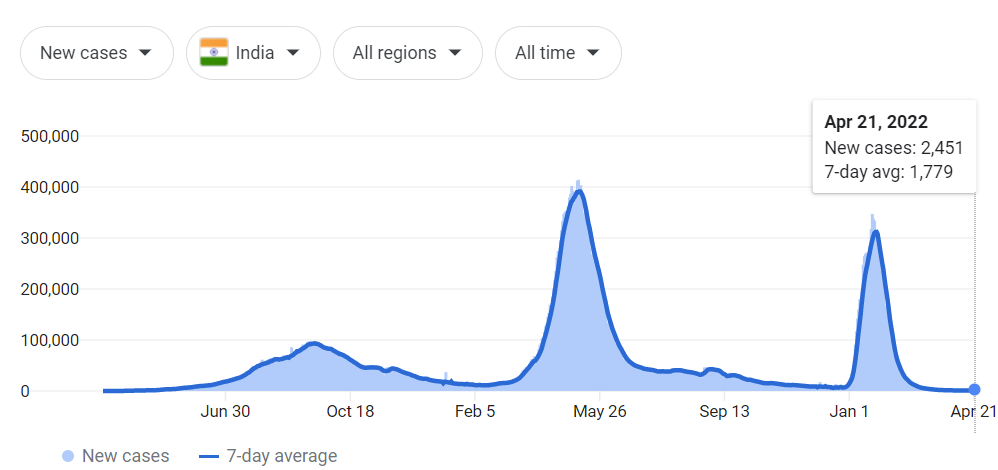


# Dataset(s) to be used:
COVID-19 Data from Datameet: https://projects.datameet.org/covid19/
                             https://github.com/datameet/covid19/tree/master/data
                             
It is community collected, cleaned and organized COVID-19 datasets about India, sourced from different government websites which are freely available. 

Ministry of Health and Family Welfare Government of India: https://www.mohfw.gov.in/

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [2]:
# reading the data from the file
with open('data/all_totals_20221021.json') as f:
    data = f.read()
    
js = json.loads(data)

Converting JSON to data frame by reading keys and values separated and then combining them into dataframe.

In [3]:
dt_list=[]
type_list=[]
value_list=[]
for item in js["rows"]:
    dt_list.append(item["key"][0][0:10])
    type_list.append(item["key"][1])
    value_list.append(item["value"])

In [4]:
df = pd.DataFrame()
df['dt']=dt_list
df['type']=type_list
df['value']=value_list

In [5]:
print(df)

              dt                   type     value
0     2020-01-30           active_cases         1
1     2020-01-30                  cured         0
2     2020-01-30                  death         0
3     2020-01-30  total_confirmed_cases         1
4     2020-02-02           active_cases         2
...          ...                    ...       ...
4031  2022-10-20  total_confirmed_cases  44636517
4032  2022-10-21           active_cases     25037
4033  2022-10-21                  cured  44084646
4034  2022-10-21                  death    528953
4035  2022-10-21  total_confirmed_cases  44638636

[4036 rows x 3 columns]


Above dataframe shows multiple lines for each date. We will need one line for each date to perform analysis and for that we will need to convert types to individual columns by pivoting the dataframe.

In [6]:
table = pd.pivot_table(df, values='value', index=['dt'],
                    columns=['type'])

df_table = table.reset_index()
df_table['dt'] = pd.to_datetime(df_table['dt'], format = '%Y-%m-%d')

In [7]:
print("Max value of active_cases:",max(df_table['active_cases']))
print("Max value of cured cases :",max(df_table['cured']))
print("Max value of deaths :",max(df_table['death']))
print("Max value of total confirmed cases: ",max(df_table['total_confirmed_cases']))

print(df_table)

Max value of active_cases: 3745237.0
Max value of cured cases : 44084646.0
Max value of deaths : 528953.0
Max value of total confirmed cases:  44638636.0
type         dt  active_cases       cured     death  total_confirmed_cases
0    2020-01-30           1.0         0.0       0.0                    1.0
1    2020-02-02           2.0         0.0       0.0                    2.0
2    2020-02-03           3.0         0.0       0.0                    3.0
3    2020-03-02           5.0         0.0       0.0                    5.0
4    2020-03-03           6.0         0.0       0.0                    6.0
..          ...           ...         ...       ...                    ...
943  2022-10-17       26834.0  44075149.0  528905.0             44630888.0
944  2022-10-18       26449.0  44077068.0  528913.0             44632430.0
945  2022-10-19       25968.0  44079485.0  528923.0             44634376.0
946  2022-10-20       25510.0  44082064.0  528943.0             44636517.0
947  2022-10-21      

# Plotting each type using line graph to analyze the trends.
# Using <span style="color:red">Red</span> color for Deaths
# Using <span style="color:green">Green</span> color for Cured
# Using <span style="color:yellow">Yellow</span>color for confirmed
# Using <span style="color:blue">Blue</span> color for Active Cases

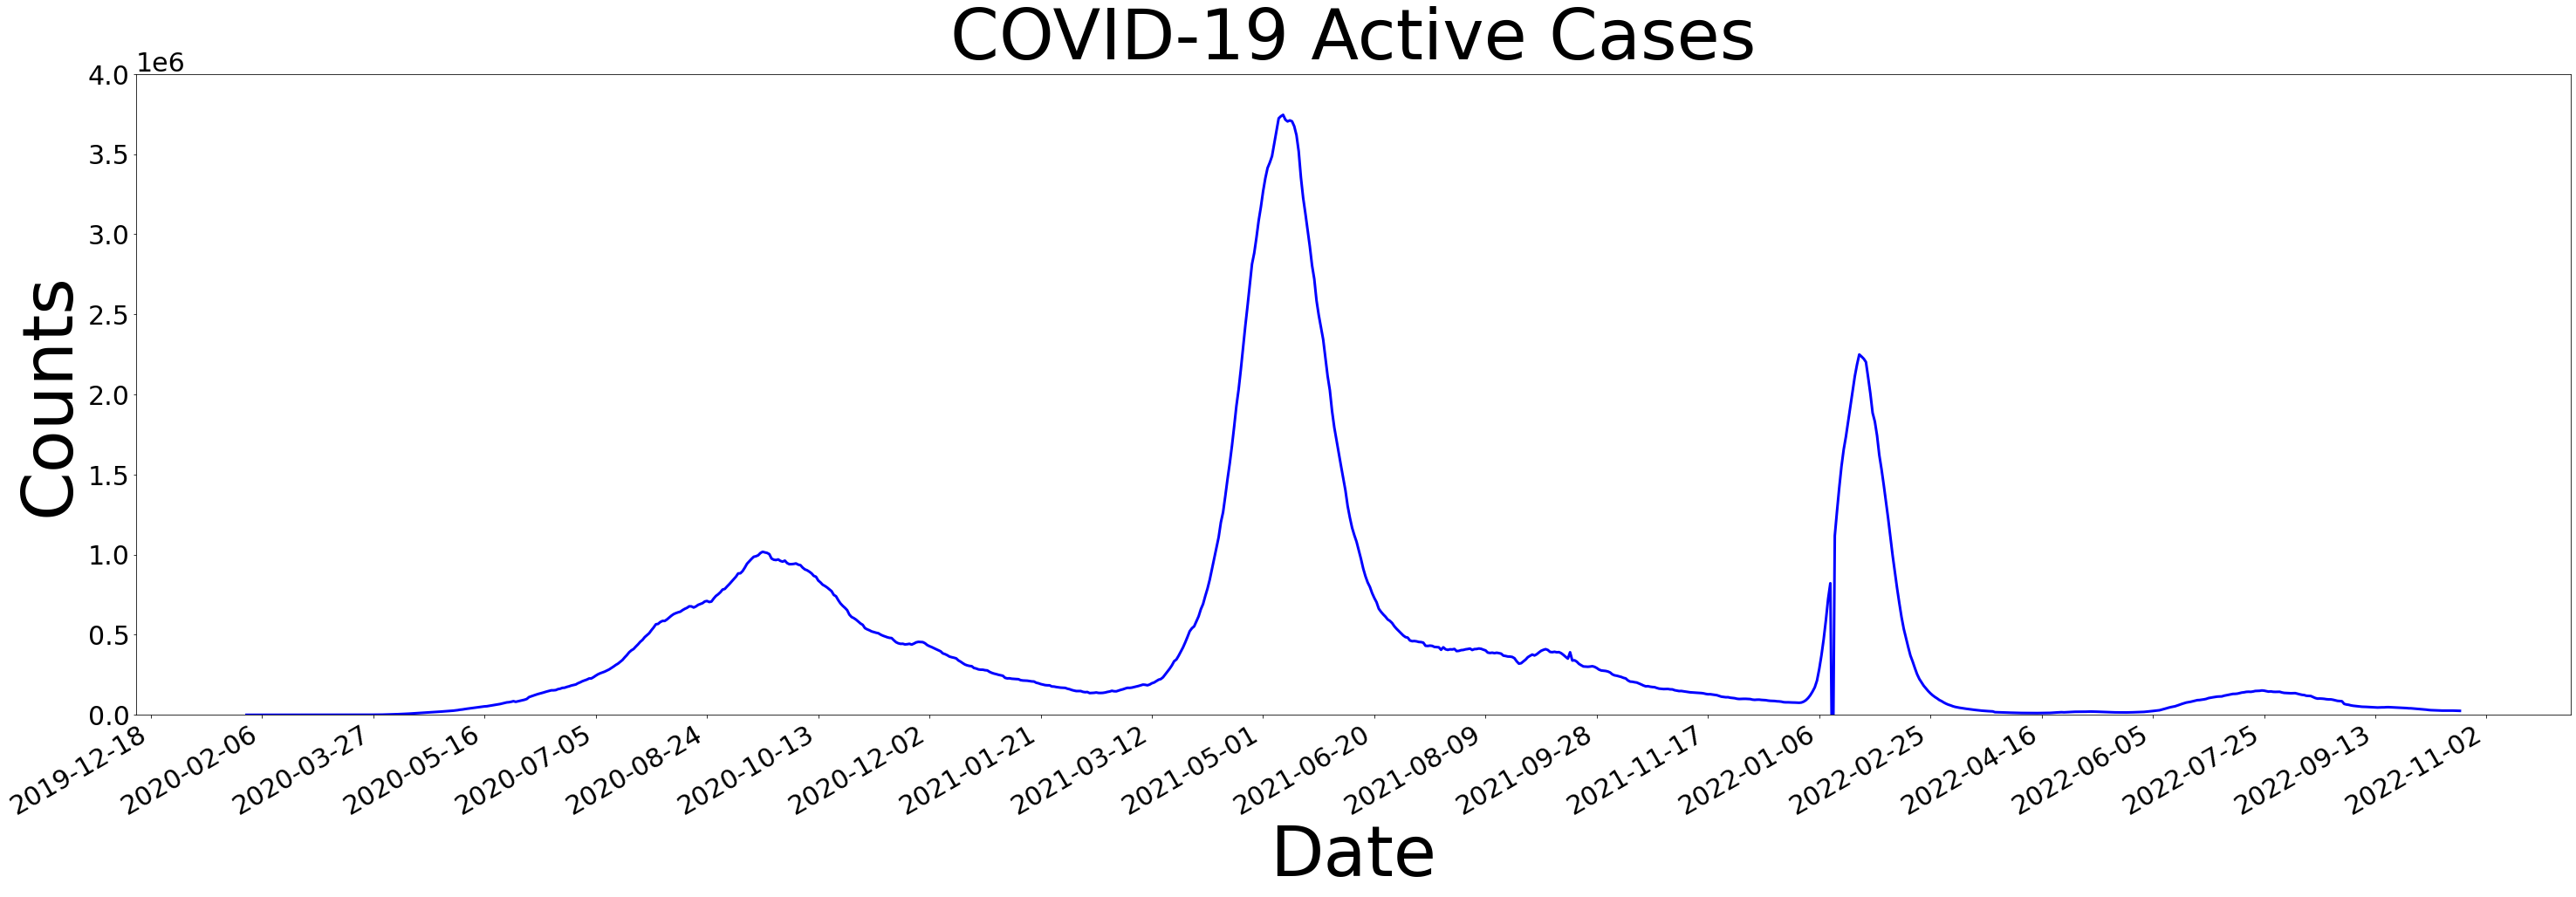

In [8]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['dt'],df_table['active_cases'],linewidth=3,color='b')
plt.title('COVID-19 Active Cases',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 4000000])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000))
plt.gcf().autofmt_xdate()
plt.show()

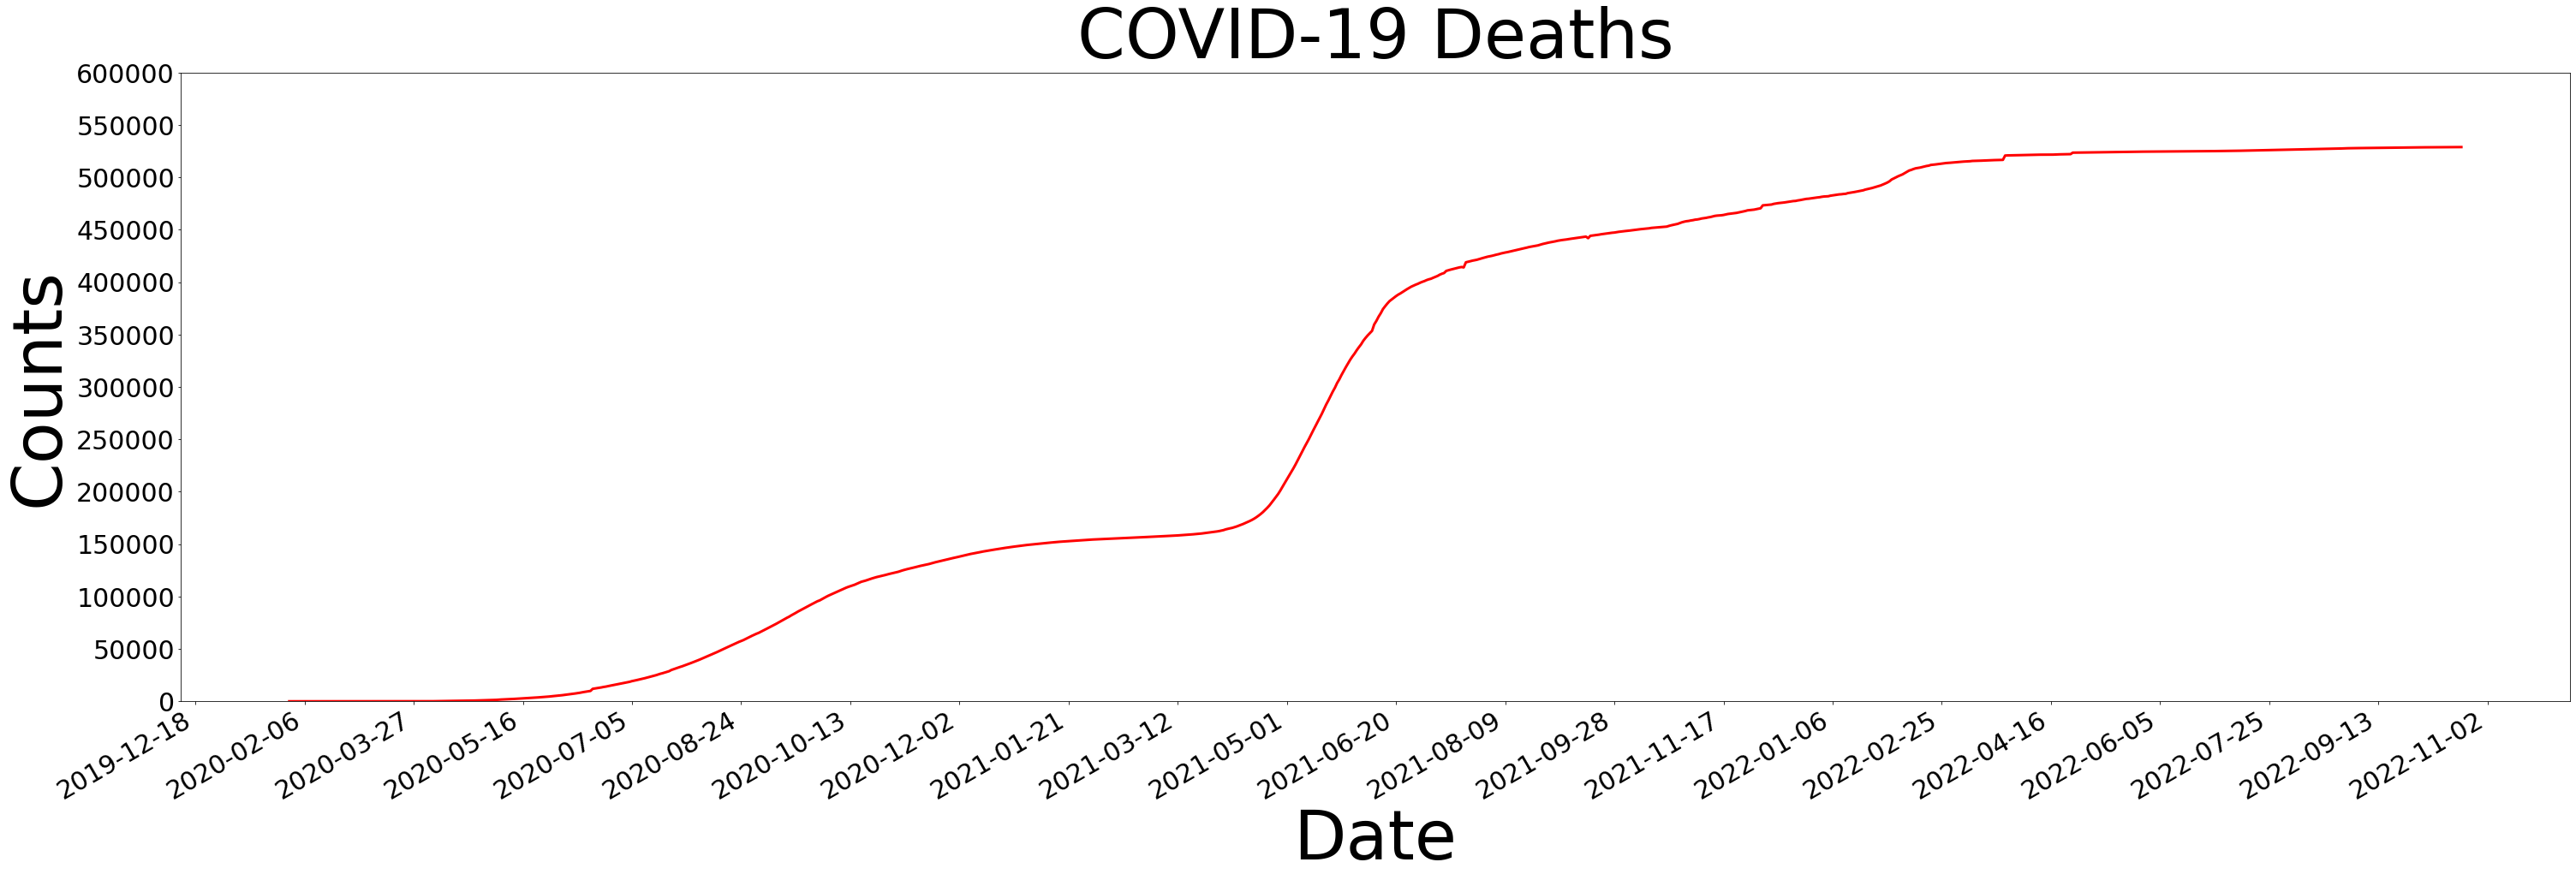

In [9]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['dt'],df_table['death'],linewidth=3,color='r')
plt.title('COVID-19 Deaths',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 600000])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50000))
plt.gcf().autofmt_xdate()
plt.show()

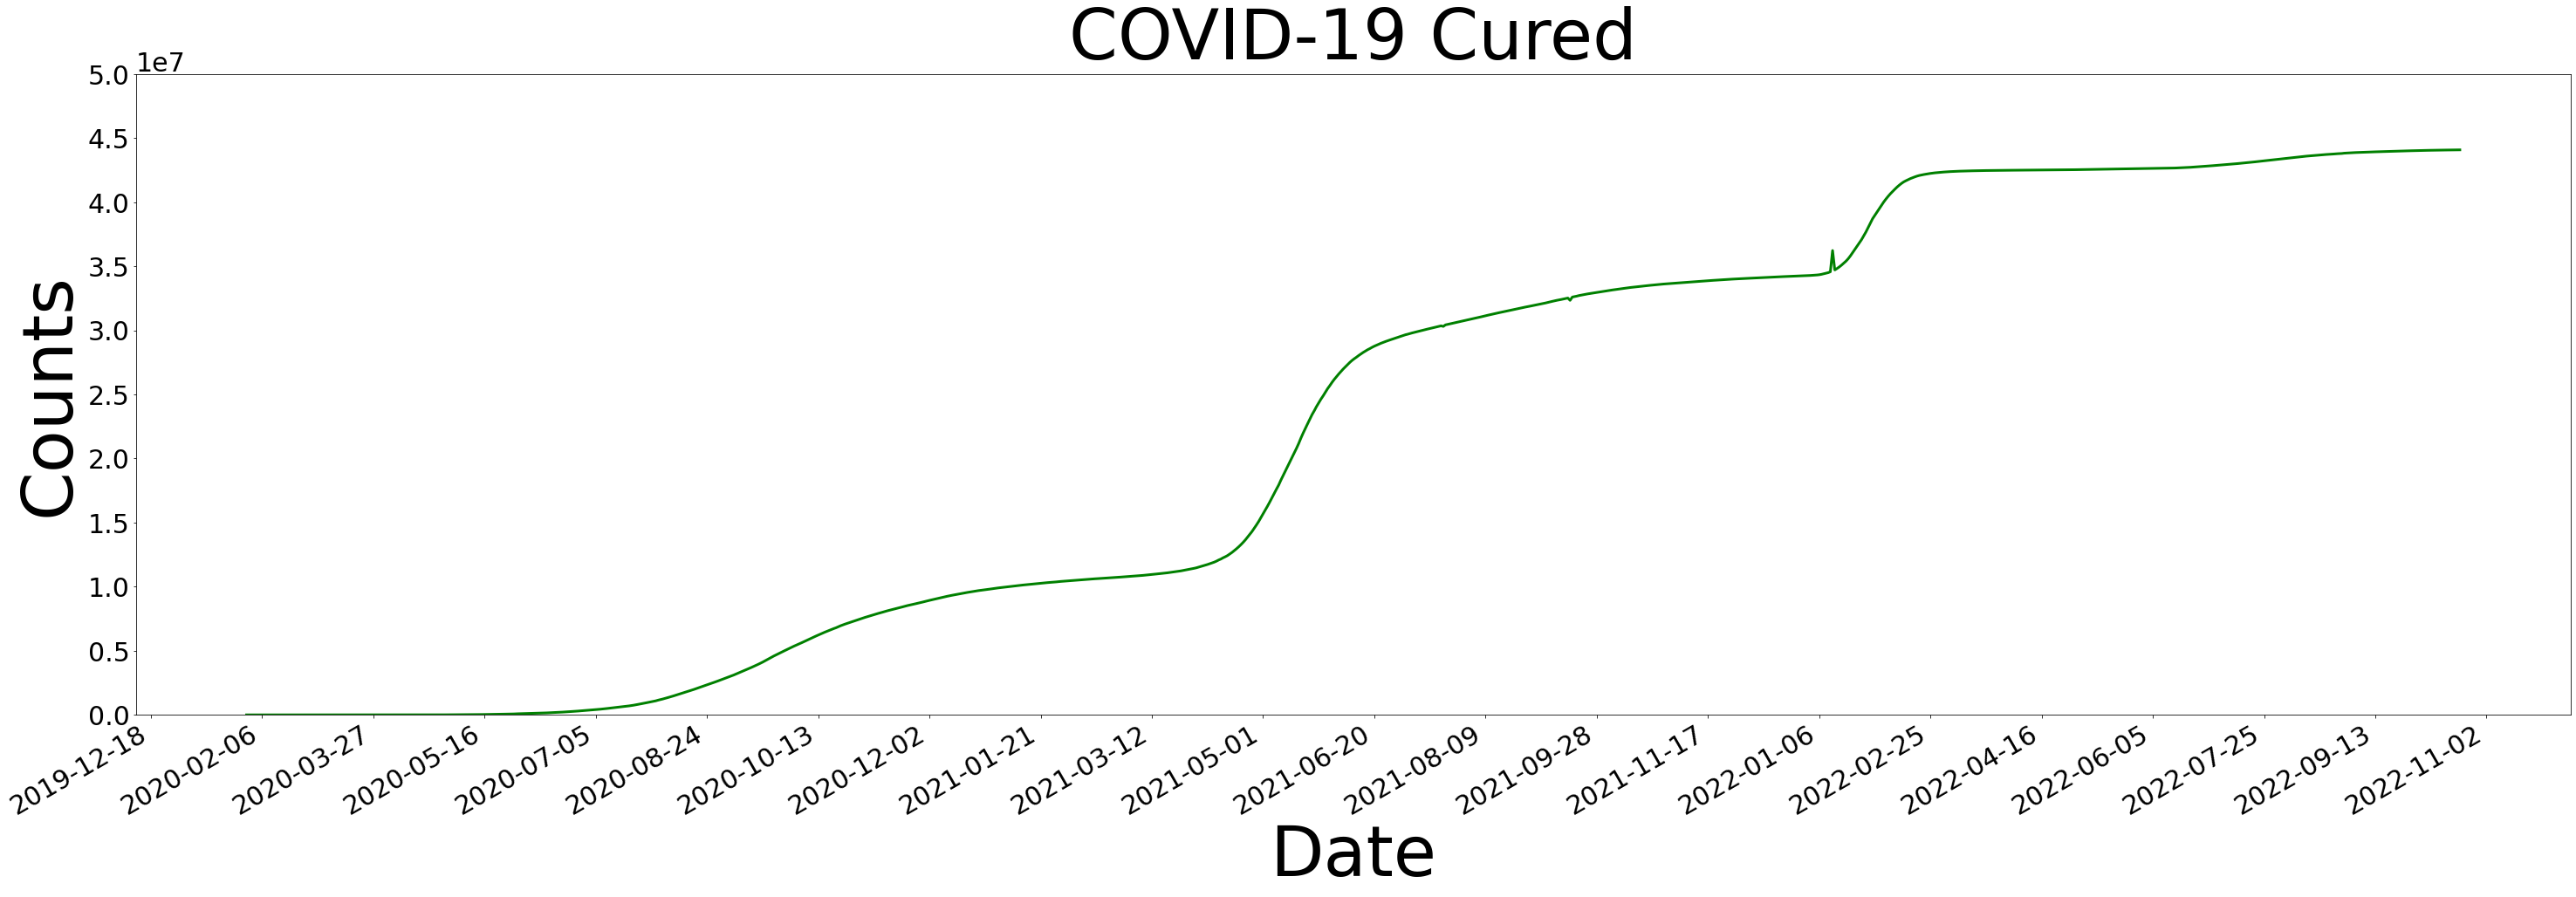

In [10]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['dt'],df_table['cured'],linewidth=3,color='g')
plt.title('COVID-19 Cured',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 50000000])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5000000))
plt.gcf().autofmt_xdate()
plt.show()

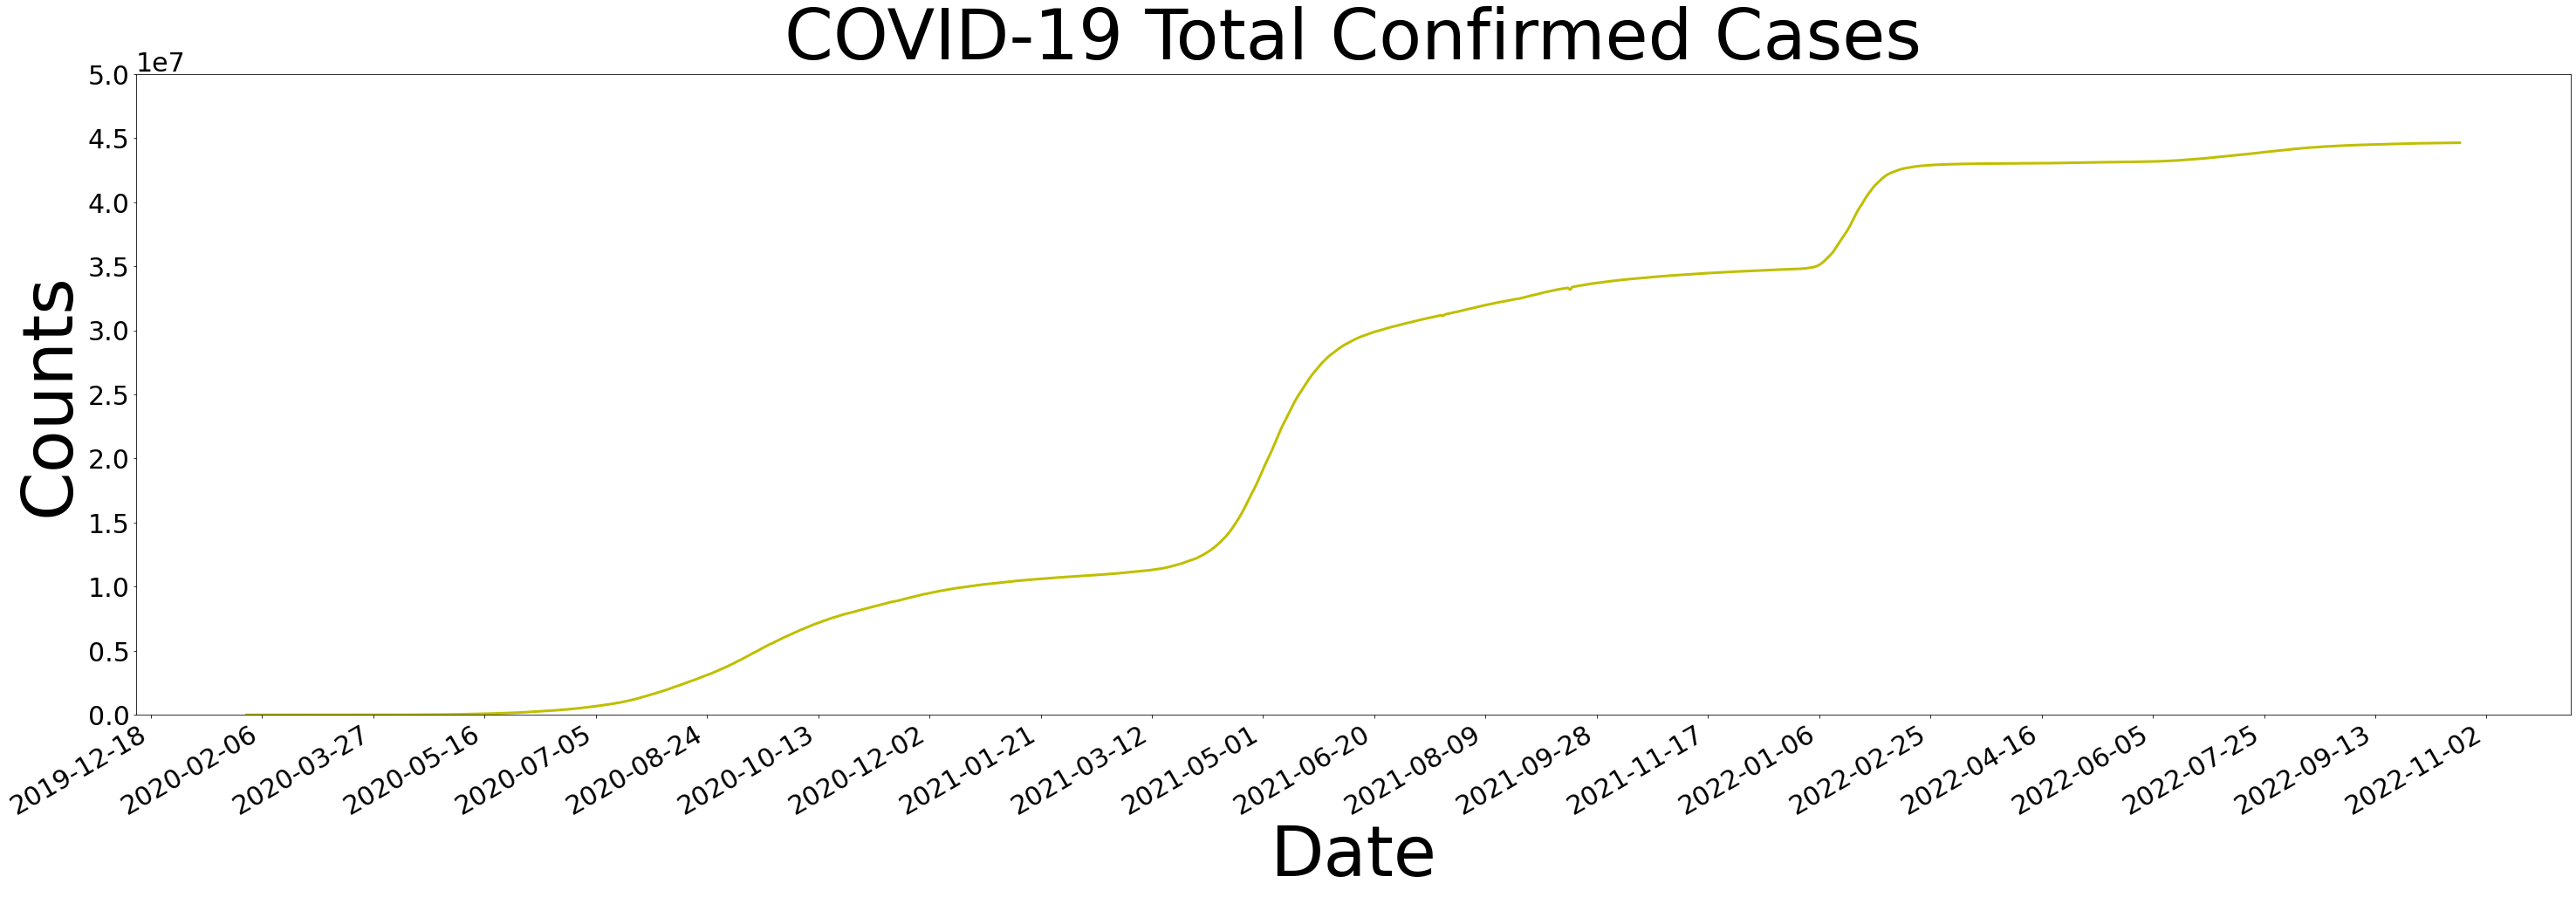

In [11]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['dt'],df_table['total_confirmed_cases'],linewidth=3,color='y')
plt.title('COVID-19 Total Confirmed Cases',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 50000000])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(5000000))
plt.gcf().autofmt_xdate()
plt.show()

We can see that deaths, cured and total_confirmed_cases are cumulative sums. We can convert them into counts on each day and plot a graph to look at the trends by subtraction previous day's count from current day.

In [12]:
df_table['death_daily']=df_table['death'] - df_table['death'].shift(1).fillna(0)
df_table['cured_daily']=df_table['cured'] - df_table['cured'].shift(1).fillna(0)
df_table['total_confirmed_cases_daily']=df_table['total_confirmed_cases'] - df_table['total_confirmed_cases'].shift(1).fillna(0)

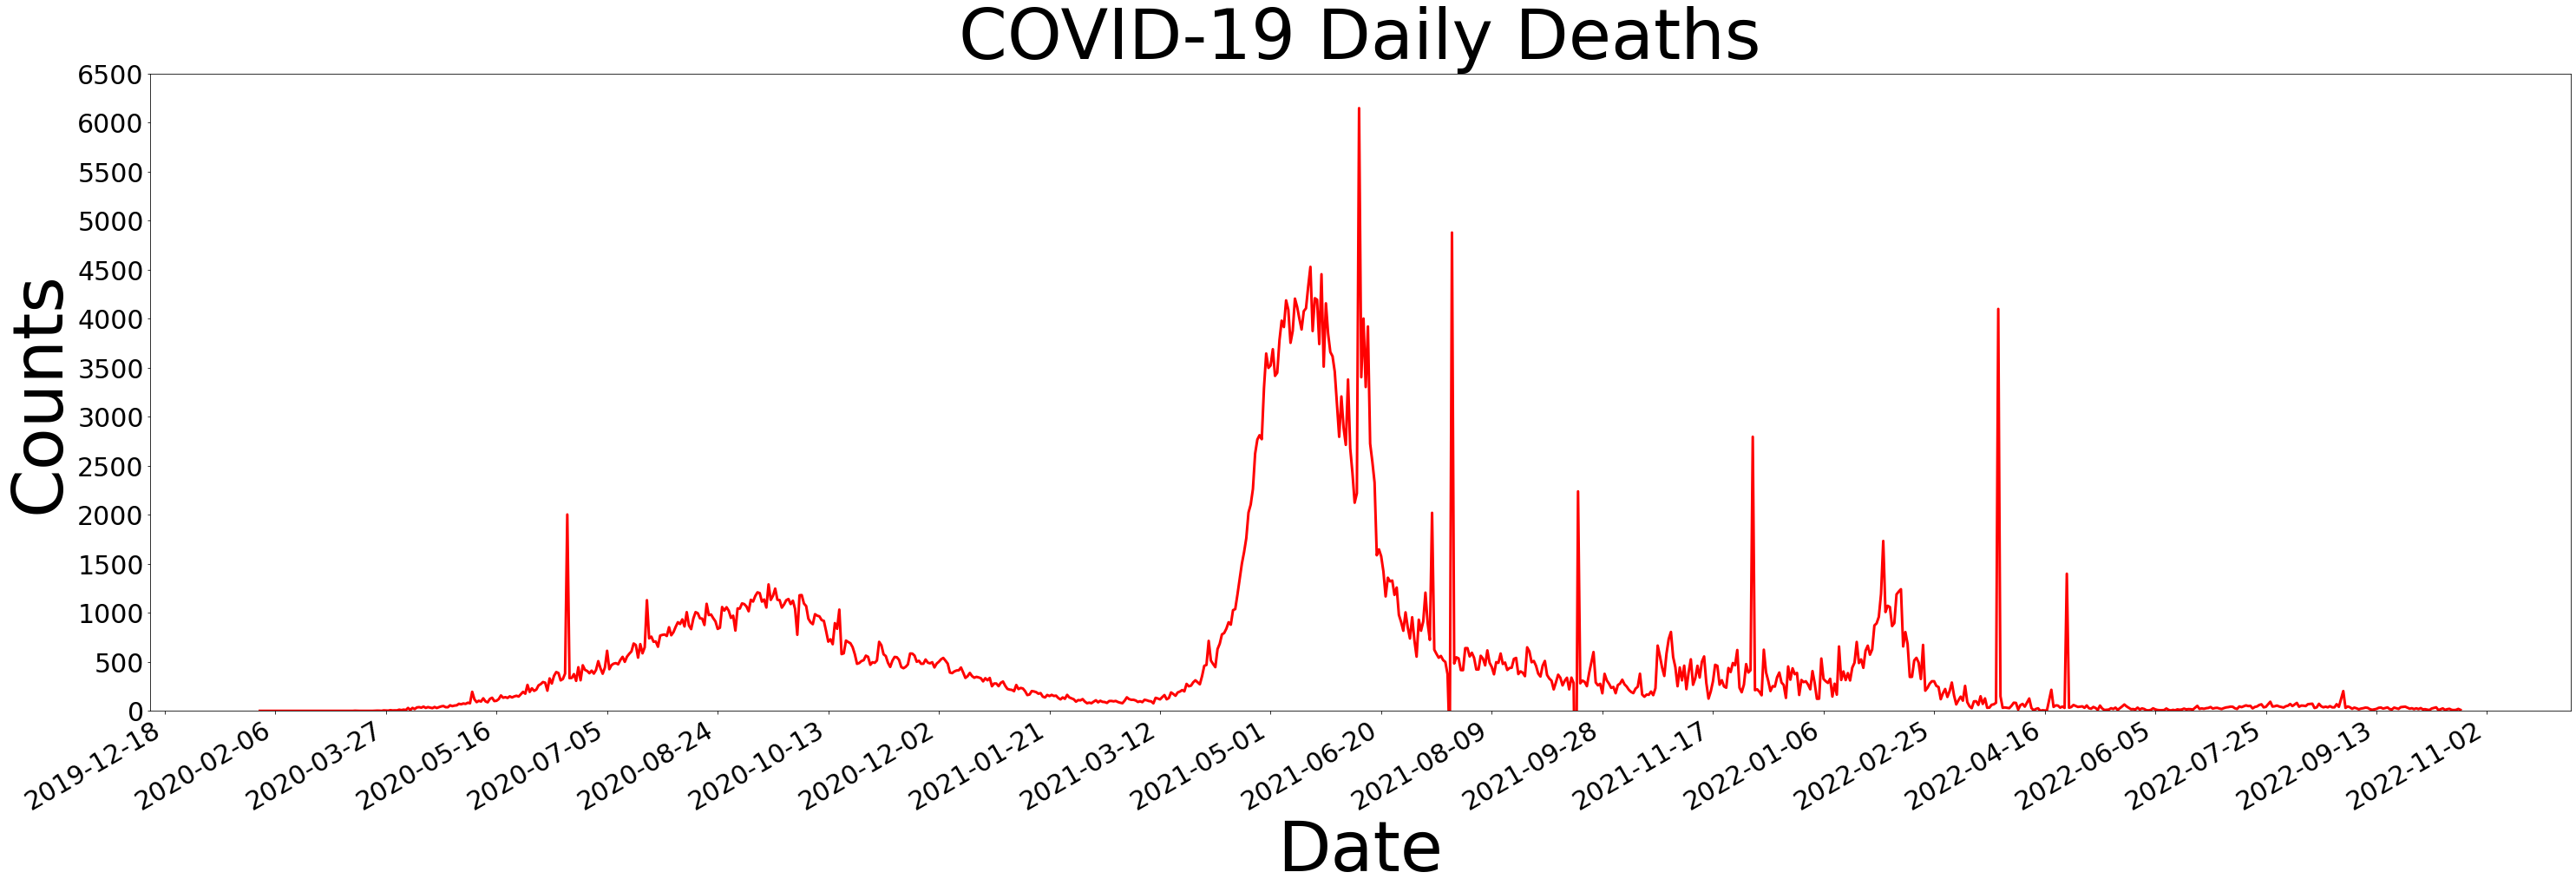

In [13]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['dt'],df_table['death_daily'],linewidth=3,color='r')
plt.title('COVID-19 Daily Deaths',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 6500])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500))
plt.gcf().autofmt_xdate()
plt.show()

Above graph gives us a trend of number of deaths each day and shows that it was pretty high during second way between 04/2021 to 06/2021.

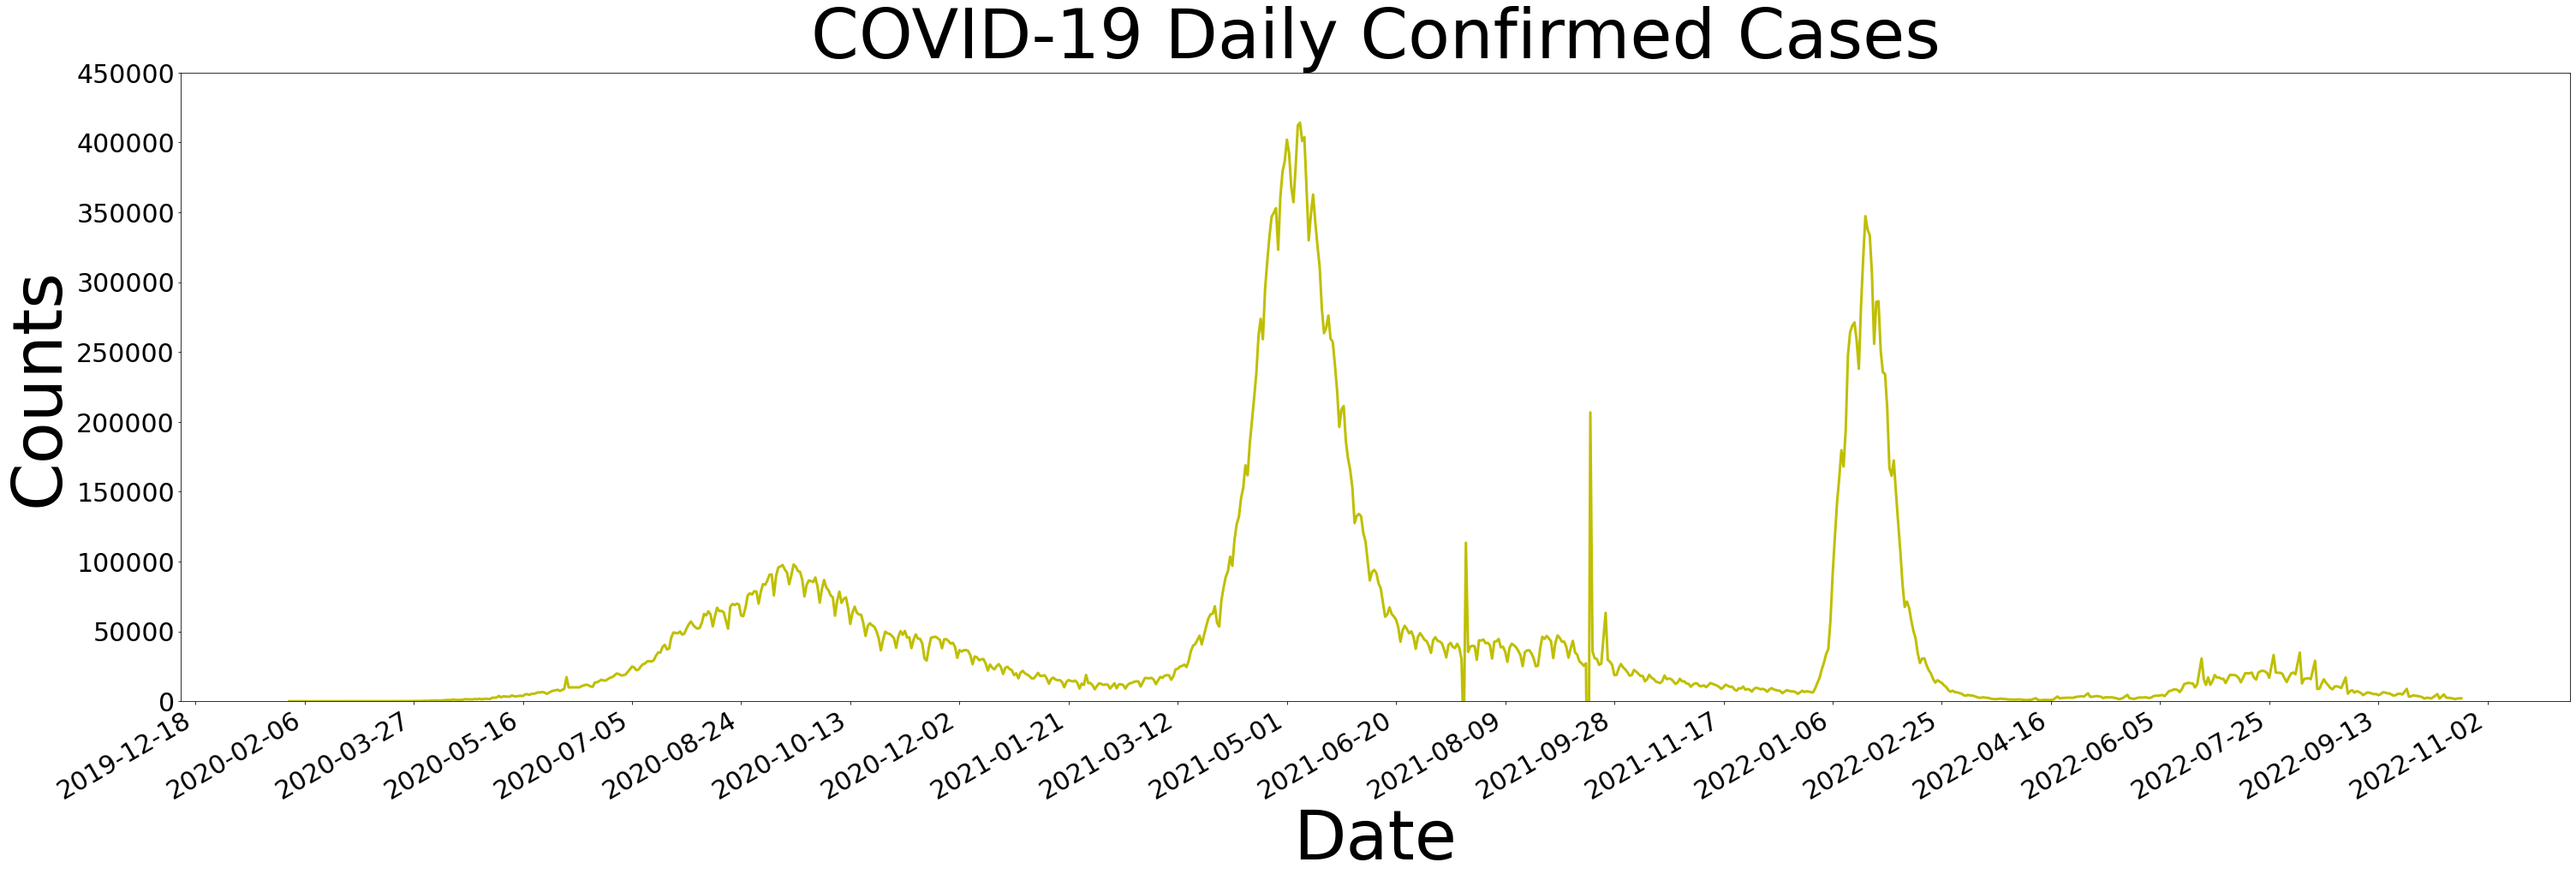

In [14]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['dt'],df_table['total_confirmed_cases_daily'],linewidth=3,color='y')
plt.title('COVID-19 Daily Confirmed Cases',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 450000])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(50000))
plt.gcf().autofmt_xdate()
plt.show()

Above graph cleary shows rise in confirmed cases during wave 1 between Jun 2020 to Dec 2020 and Wave 2 between April 2021 to Jun 2021. 
In addition to that above graph shows confirmed cases increased between Jan 2022 to March 2022.

In [15]:
print(df_table)

type         dt  active_cases       cured     death  total_confirmed_cases  \
0    2020-01-30           1.0         0.0       0.0                    1.0   
1    2020-02-02           2.0         0.0       0.0                    2.0   
2    2020-02-03           3.0         0.0       0.0                    3.0   
3    2020-03-02           5.0         0.0       0.0                    5.0   
4    2020-03-03           6.0         0.0       0.0                    6.0   
..          ...           ...         ...       ...                    ...   
943  2022-10-17       26834.0  44075149.0  528905.0             44630888.0   
944  2022-10-18       26449.0  44077068.0  528913.0             44632430.0   
945  2022-10-19       25968.0  44079485.0  528923.0             44634376.0   
946  2022-10-20       25510.0  44082064.0  528943.0             44636517.0   
947  2022-10-21       25037.0  44084646.0  528953.0             44638636.0   

type  death_daily  cured_daily  total_confirmed_cases_daily  
0

In [16]:
# We are going to use vaccination data as well in out project so reading the data from the file
# and creating a dataframe on top of it:

with open('data/mohfw_vaccination_status_20221021.json') as f:
    data_vac = f.read()
    
js_vac = json.loads(data_vac)

report_time_list=[]
total_vacc_cnt_list=[]
first_dose_cnt_list=[]
second_dose_cnt_list=[]

for item in js_vac["rows"]:
    for key in item["value"]:
        if key=="report_time":
            report_time_list.append(item["value"][key][0:10])
        if key=="total":
            total_vacc_cnt_list.append(item["value"][key])
        if key=="first_dose":
            first_dose_cnt_list.append(item["value"][key])
        if key=="second_dose":
            second_dose_cnt_list.append(item["value"][key])

df_vac = pd.DataFrame()
df_vac['report_date']=report_time_list
df_vac['total_vacc_cnt']=total_vacc_cnt_list
df_vac['first_dose_cnt']=first_dose_cnt_list
df_vac['second_dose_cnt']=second_dose_cnt_list

pd.set_option('display.max_rows', 10)
print(df_vac)


  

    report_date  total_vacc_cnt  first_dose_cnt  second_dose_cnt
0    2021-01-16          191181             NaN              NaN
1    2021-01-17          224301             NaN              NaN
2    2021-01-18          454049             NaN              NaN
3    2021-01-19          674835             NaN              NaN
4    2021-01-20          674835             NaN              NaN
..          ...             ...             ...              ...
635  2022-10-17      2193343651     921950758.0      864237716.0
636  2022-10-18      2193766738     921957855.0      864266662.0
637  2022-10-19      2194143525     921964213.0      864295480.0
638  2022-10-20      2194634236     921971370.0      864330347.0
639  2022-10-21      2195097574     921978722.0      864371149.0

[640 rows x 4 columns]



# Step1: Drop any features that are not useful for your model building and explain why they are not useful.

We are going to drop active_cases, cured, death and total_confirmed_cases as these are cummulative sums and we will be using daily counts to make predictions from our df_table dataframe.

In [17]:
df_table.drop(columns=['active_cases','cured','death','total_confirmed_cases'],inplace=True)

In [18]:
#renaming date column as it will be used to join with vaccine dataset
df_table.rename({'dt':'report_date'},axis=1,inplace=True)
print(df_table)

type report_date  death_daily  cured_daily  total_confirmed_cases_daily
0     2020-01-30          0.0          0.0                          1.0
1     2020-02-02          0.0          0.0                          1.0
2     2020-02-03          0.0          0.0                          1.0
3     2020-03-02          0.0          0.0                          2.0
4     2020-03-03          0.0          0.0                          1.0
..           ...          ...          ...                          ...
943   2022-10-17         10.0       1841.0                       2060.0
944   2022-10-18          8.0       1919.0                       1542.0
945   2022-10-19         10.0       2417.0                       1946.0
946   2022-10-20         20.0       2579.0                       2141.0
947   2022-10-21         10.0       2582.0                       2119.0

[948 rows x 4 columns]


# STEP 2: Transform features if necessary.

In [19]:
#Converting report_date in both dataframes to string in order for it to be used as a key to join

df_table['report_date'] =df_table['report_date'].astype(str)
df_vac['report_date'] =df_vac['report_date'].astype(str)

In [20]:
df=pd.merge(df_table,df_vac,how='inner',left_on=['report_date'],right_on=['report_date'])

In [21]:
print(df)

    report_date  death_daily  cured_daily  total_confirmed_cases_daily  \
0    2021-01-16        175.0      16977.0                      15158.0   
1    2021-01-17        181.0      17170.0                      15144.0   
2    2021-01-18        145.0      14457.0                      13788.0   
3    2021-01-19        137.0      17411.0                      10064.0   
4    2021-01-20        162.0      16988.0                      13823.0   
..          ...          ...          ...                          ...   
624  2022-10-17         10.0       1841.0                       2060.0   
625  2022-10-18          8.0       1919.0                       1542.0   
626  2022-10-19         10.0       2417.0                       1946.0   
627  2022-10-20         20.0       2579.0                       2141.0   
628  2022-10-21         10.0       2582.0                       2119.0   

     total_vacc_cnt  first_dose_cnt  second_dose_cnt  
0            191181             NaN              NaN  
1

In [22]:
# Finding invalid records with invalid values such as counts can not be negative
print(df[(df.death_daily < 0)  | (df.total_confirmed_cases_daily < 0)])

    report_date  death_daily  cured_daily  total_confirmed_cases_daily  \
186  2021-07-21       -374.0     -45254.0                     -30093.0   
242  2021-09-16      -1488.0    -179872.0                    -141801.0   

     total_vacc_cnt  first_dose_cnt  second_dose_cnt  
186       415472455     328716212.0       86756243.0  
242       765717137     578646751.0      187070386.0  


In [23]:
# Dropping above invalid records
df.drop(df[df['death_daily'] < 0].index)

,report_date,death_daily,cured_daily,total_confirmed_cases_daily,total_vacc_cnt,first_dose_cnt,second_dose_cnt
0,2021-01-16,175.0,16977.0,15158.0,191181,NaN,NaN
1,2021-01-17,181.0,17170.0,15144.0,224301,NaN,NaN
2,2021-01-18,145.0,14457.0,13788.0,454049,NaN,NaN
3,2021-01-19,137.0,17411.0,10064.0,674835,NaN,NaN
4,2021-01-20,162.0,16988.0,13823.0,674835,NaN,NaN
...,...,...,...,...,...,...,...
624,2022-10-17,10.0,1841.0,2060.0,2193343651,921950758.0,864237716.0
625,2022-10-18,8.0,1919.0,1542.0,2193766738,921957855.0,864266662.0
626,2022-10-19,10.0,2417.0,1946.0,2194143525,921964213.0,864295480.0
627,2022-10-20,20.0,2579.0,2141.0,2194634236,921971370.0,864330347.0


In [24]:
df_table = df.reset_index()
df_table['report_date'] = pd.to_datetime(df_table['report_date'], format = '%Y-%m-%d')
print(df_table)

     index report_date  death_daily  cured_daily  total_confirmed_cases_daily  \
0        0  2021-01-16        175.0      16977.0                      15158.0   
1        1  2021-01-17        181.0      17170.0                      15144.0   
2        2  2021-01-18        145.0      14457.0                      13788.0   
3        3  2021-01-19        137.0      17411.0                      10064.0   
4        4  2021-01-20        162.0      16988.0                      13823.0   
..     ...         ...          ...          ...                          ...   
624    624  2022-10-17         10.0       1841.0                       2060.0   
625    625  2022-10-18          8.0       1919.0                       1542.0   
626    626  2022-10-19         10.0       2417.0                       1946.0   
627    627  2022-10-20         20.0       2579.0                       2141.0   
628    628  2022-10-21         10.0       2582.0                       2119.0   

     total_vacc_cnt  first_

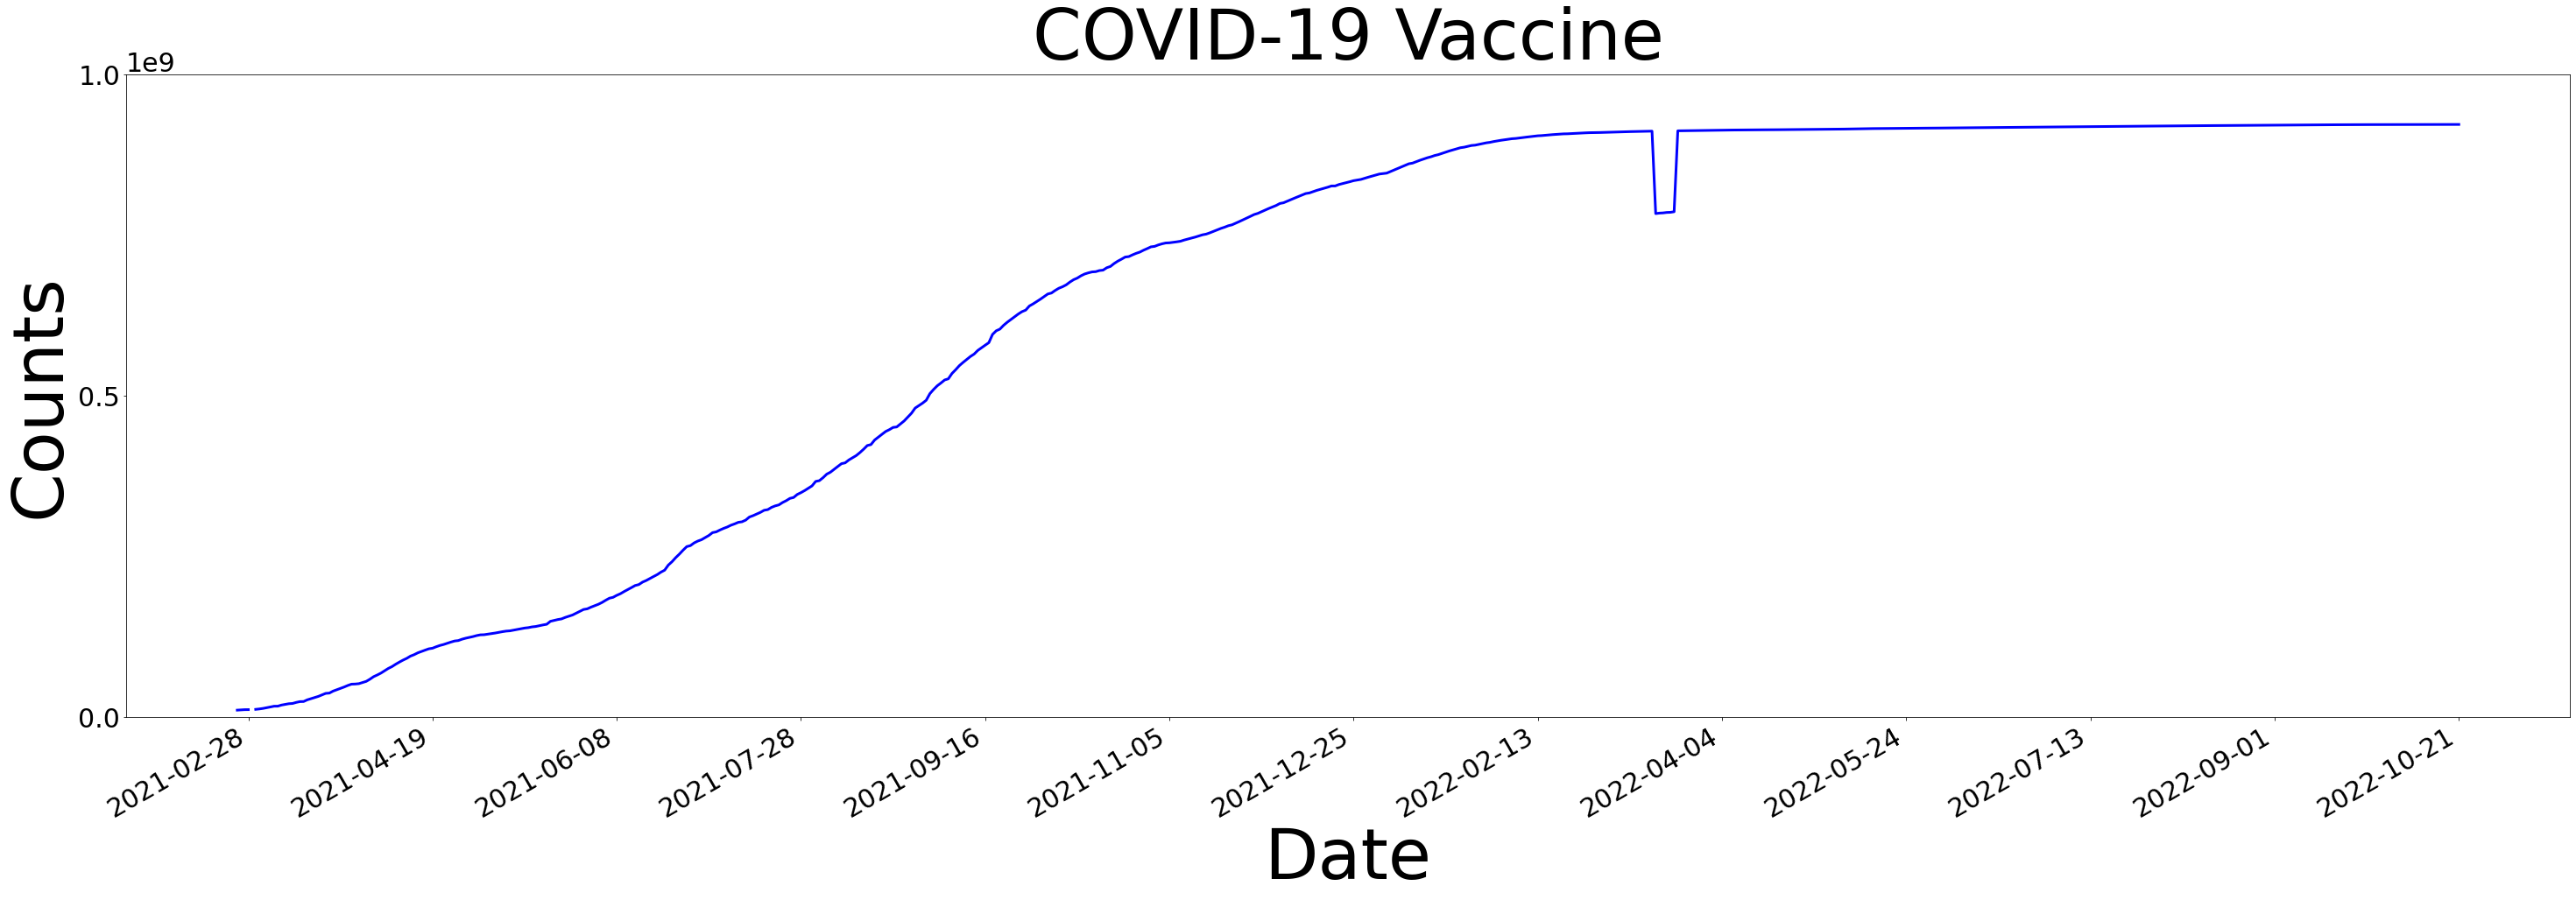

In [25]:
plt.figure(figsize=(50, 15))
plt.rcParams['font.size'] = '30'
plt.plot(df_table['report_date'],df_table['first_dose_cnt'],linewidth=3,color='b')
plt.title('COVID-19 Vaccine',fontdict = {'fontsize' : 80})
plt.xlabel('Date',fontdict = {'fontsize' : 80})
plt.ylabel('Counts',fontdict = {'fontsize' : 80})
ax=plt.gca()
plt.setp(ax.xaxis.get_majorticklabels(),'rotation', 90)
ax.xaxis.set_major_locator(md.DayLocator(interval=50))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylim([0, 1000000000])
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(500000000))
plt.gcf().autofmt_xdate()
plt.show()

# STEP 3: Engineer new useful features.

In [26]:
df.set_index('report_date',inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2021-01-16 to 2022-10-21
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   death_daily                  629 non-null    float64
 1   cured_daily                  629 non-null    float64
 2   total_confirmed_cases_daily  629 non-null    float64
 3   total_vacc_cnt               629 non-null    int64  
 4   first_dose_cnt               588 non-null    float64
 5   second_dose_cnt              588 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 34.4+ KB


In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')

imputer = imputer.fit(df)

data = imputer.transform(df)

scaler = MinMaxScaler()
data = scaler.fit_transform(data)
#df_table=scaler.fit_tranform(df_table)

In [29]:
print(data)

[[2.17784180e-01 4.82479421e-01 2.82305945e-01 0.00000000e+00
  6.95132470e-01 5.36340675e-01]
 [2.18569932e-01 4.82540197e-01 2.82280765e-01 1.50894818e-05
  6.95132470e-01 5.36340675e-01]
 [2.13855422e-01 4.81685865e-01 2.79841867e-01 1.19762738e-04
  6.95132470e-01 5.36340675e-01]
 ...
 [1.96176008e-01 4.77894432e-01 2.58542885e-01 9.99565335e-01
  9.99984072e-01 9.99912294e-01]
 [1.97485595e-01 4.77945446e-01 2.58893611e-01 9.99788903e-01
  9.99991929e-01 9.99952707e-01]
 [1.96176008e-01 4.77946391e-01 2.58854042e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


# Step 4: Deal with missing data (do not just drop rows or columns without justifying this).

Filling missing data if any with mode of the respective field.

In [30]:
df['death_daily'] = df['death_daily'].fillna(df['death_daily'].mode()[0])
df['cured_daily'] = df['cured_daily'].fillna(df['cured_daily'].mode()[0])
df['total_confirmed_cases_daily'] = df['total_confirmed_cases_daily'].fillna(df['total_confirmed_cases_daily'].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 629 entries, 2021-01-16 to 2022-10-21
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   death_daily                  629 non-null    float64
 1   cured_daily                  629 non-null    float64
 2   total_confirmed_cases_daily  629 non-null    float64
 3   total_vacc_cnt               629 non-null    int64  
 4   first_dose_cnt               588 non-null    float64
 5   second_dose_cnt              588 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 34.4+ KB


We can see First dose is NaN when total number of vaccines count has values. This means there is some values in first dose. We can just replicate total vaccine counts in first dose till there is some value in second dose column i.e. till row 39.

In [31]:
for i in range(40):
    df.iat[i,5] = df.iat[i,4]

Now fill missing values with the 0 and consider there is no vaccine that day.

In [32]:
df.fillna(0,inplace=True)
print(df)

             death_daily  cured_daily  total_confirmed_cases_daily  \
report_date                                                          
2021-01-16         175.0      16977.0                      15158.0   
2021-01-17         181.0      17170.0                      15144.0   
2021-01-18         145.0      14457.0                      13788.0   
2021-01-19         137.0      17411.0                      10064.0   
2021-01-20         162.0      16988.0                      13823.0   
...                  ...          ...                          ...   
2022-10-17          10.0       1841.0                       2060.0   
2022-10-18           8.0       1919.0                       1542.0   
2022-10-19          10.0       2417.0                       1946.0   
2022-10-20          20.0       2579.0                       2141.0   
2022-10-21          10.0       2582.0                       2119.0   

             total_vacc_cnt  first_dose_cnt  second_dose_cnt  
report_date               

#  Model: Time-Series using sequential LSTM

In [33]:
i = 0
array = []
array_temp = []
train_data = []
train_labels = []


# Converting daily cofirmed cases count to array list and reshaping to single attribute

array_temp=df['total_confirmed_cases_daily'].tolist()
array_temp = np.array(array_temp).reshape(-1,1)

# Applying MinMaxScaler to bring the data in 0–1 range.

array_temp = scaler.fit_transform(array_temp)
array_temp = array_temp.tolist()

for i in array_temp:
    array.append(i[0])
    
x=0

# Creating the training data. 
# Picking 90 days as window size for time series
# For every 90 th record in one list, the 91st record is the label

for i in range(len(array)):
    try:
        train_data.append(array[x:90+x]) # Creating inner lists with 'day' days of data
        train_labels.append([array[90+x]])
        x+=1
    except:
        break

length = max(map(len, train_data))
train_data=np.array([i+[None]*(length-len(i)) for i in train_data]).astype('float32')

print(train_labels)
length = max(map(len, train_labels))
train_labels = np.array([xi+[None]*(length-len(xi)) for xi in train_labels]).astype('float32')


# Expand dimensions of the training dataset 

train_data = train_data[:len(train_labels)]
train_data = np.expand_dims(train_data,1)
train_data.shape

[[0.6459732117002315], [0.6771590804854053], [0.7253758617526607], [0.747516587558387], [0.7211851313605127], [0.7857025948355094], [0.8213040186046847], [0.8534899071744226], [0.8787709828791577], [0.8839959063938316], [0.8899312756187623], [0.8362485588743662], [0.9042642929986024], [0.937173217455741], [0.9501141209628248], [0.9780661128187789], [0.9609704508542436], [0.9171908077318076], [0.8975537285809612], [0.9426733262708435], [0.9965359026887224], [1.0], [0.9764203968064118], [0.9812046641210528], [0.9136187946164402], [0.8484754194777235], [0.8817116885406007], [0.9074424134290426], [0.8722204935709161], [0.8415616136290467], [0.814712161571542], [0.7611427564214401], [0.7290324089145649], [0.7358688751036442], [0.7516533600484903], [0.7218703967164819], [0.7178199568696504], [0.6882204504045943], [0.6548978486984456], [0.6083357764272315], [0.6308074440321662], [0.635082708470851], [0.5902364974846626], [0.5676209421409417], [0.5528059008361677], [0.5297496892924141], [0.484

(539, 1, 90)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Activation,Dense,Dropout

In [35]:
model = Sequential()
# Add a long short-term memory layer with 100 memory units and using rectified linear activation function (RELU) which will output the input directly if it is positive, otherwise, it will output zero.
# I am using a 20% dropout

model.add(LSTM(100,input_shape=(1,90)))
model.add(Dropout(0.2))

#Adding a dense layer of 100 with RELU and dropout of 20%
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

#Adding a dense layer of 90 with RELU and dropout of 20%
model.add(Dense(90,activation='relu'))
model.add(Dropout(0.2))

#Finally adding a dense layer of 1 with RELU
model.add(Dense(1,activation='relu'))

#Compiling the model with adam optimizer
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               76400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 90)                9090      
_________________________________________________________________
dropout_2 (Dropout)          (None, 90)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9

In [76]:
#Fitting the data

from tensorflow.keras.callbacks import EarlyStopping

# different values of epochs are tries and 45 seems to be the most accurate value.

E = 12
callback = EarlyStopping(monitor='loss', mode='min', patience=6)
H = model.fit(train_data,train_labels,epochs=E, verbose=0, callbacks=[callback])

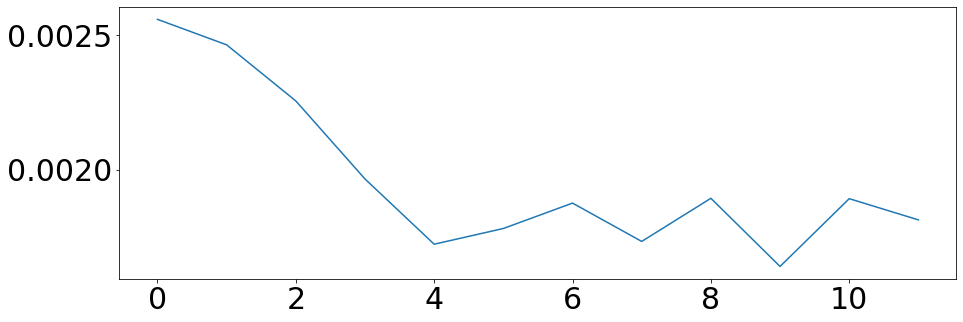

In [77]:
#Plotting the loss value

loss = H.history['loss']
epochs = range(0,len(loss))
plt.figure(figsize=(15,5))
plt.plot(epochs,loss)

We can see by the end of epochs we are in much better state. Note: I have tried different values of epochs and feels like model is most accurate around 12.

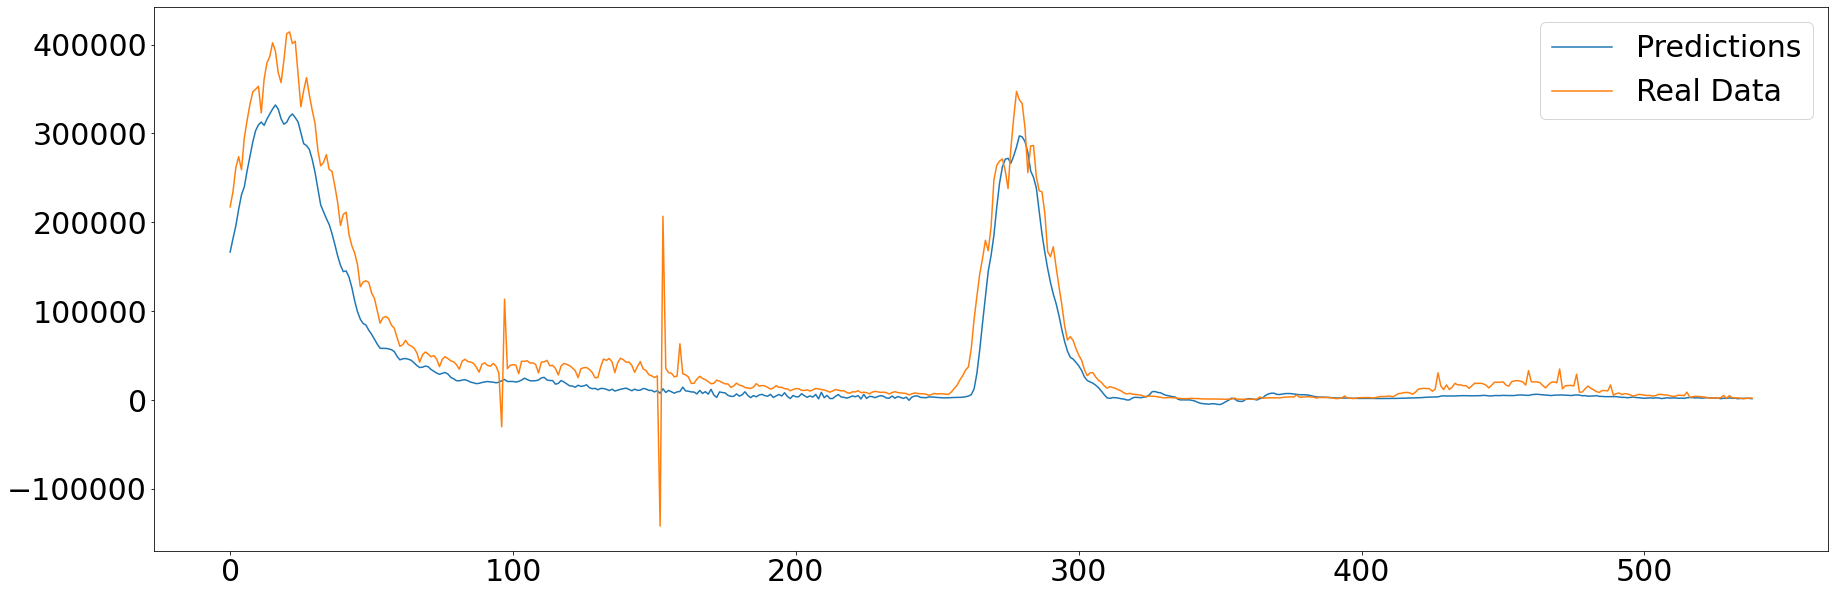

In [78]:
#ploting the predictions given by LSTM with the real values

preds = scaler.inverse_transform(model.predict(train_data))
plt.figure(figsize=(30,10))
plt.plot(preds,label='Predictions')
plt.plot(scaler.inverse_transform(train_labels),label='Real Data')
plt.legend()

Above plot shows that our model is pretty accurate and predictions are mostly matching real values except at certain spikes in real data which I am going to ignore as outliers.

Future Predictions for next 90 days

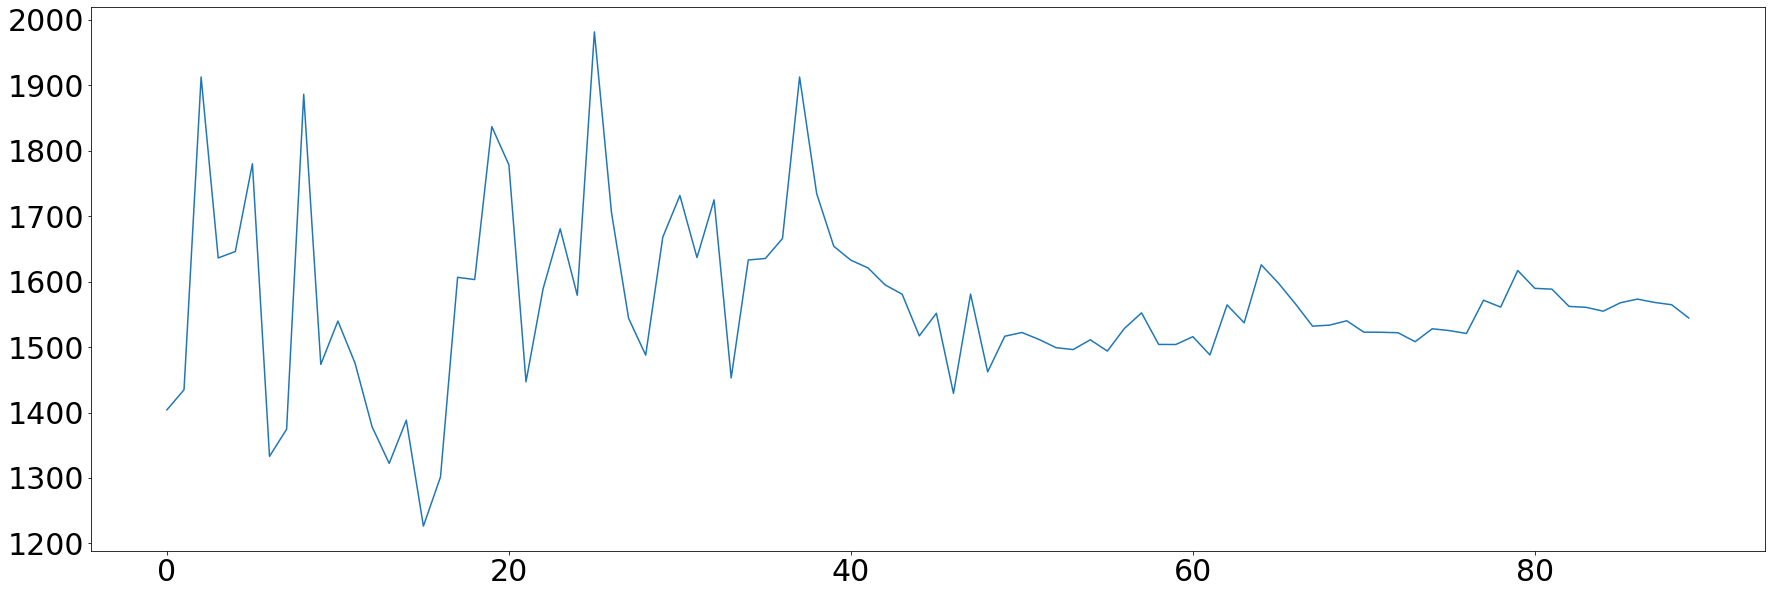

In [79]:
prediction_days = 90
seed = array[-90:]


for _ in range(prediction_days):
    cur_days = seed[-90:]
    cur_days = np.squeeze(cur_days)
    cur_days = np.expand_dims(cur_days,0)
    cur_days = np.expand_dims(cur_days,0)
    pred = model.predict(cur_days)
    seed = np.append(seed,pred)
    
future_pred = scaler.inverse_transform(seed[-prediction_days:].reshape(-1,1))
plt.figure(figsize=(30,10))
plt.plot(range(0,prediction_days),future_pred)

A quick test of above predictions is that currently counts are too low (i.e. 2000 or less) and above model is also predicting the same.

In [80]:
# how many total cases does the model predict for the upcoming 90 days?
future_new_cases = 0
for i in future_pred:
    future_new_cases += i[0]
    #print(i)
print(future_new_cases)

140983.99498662254


Above model predicts around 141k new covid cases in next 90 days.